# Supplement S1 to the paper by Fischer, Herzel and Blüthgen (2021): Numerical examinations and plots

# Setup

In [1]:
######################
### Load libraries ###
######################

# Plotting and numpy
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)
import seaborn as sns
import numpy as np

# Progress bar
import tqdm

# Complex maths
import cmath

########################
### Helper functions ###
########################

def defect(f, t_max = 1000, step=0.01):
    ''' Evaluate function f
    We evaluate in [0, t_max] with a step size of step
    The standard value of t_max = 1000 can be increased without significantly changing the results,
    similarly, the step size can be chosen smaller, however more computing time will be required. '''
    ts = np.arange(0,t_max,step)
    ys = f(ts)

    # Change data type to an array of real numbers
    ys = np.real(np.array(ys))
        
    # Only consider negative side of the integral as discussed in Definition 3.14
    ys = np.minimum(ys, 0)
        
    # Calculate and save final result
    defect = np.sum([step*y for y in ys])
    return defect

def beautify_ax(a):
    ''' Make subplot ax a bit more pleasing '''
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.tick_params("both", labelsize=30)
    a.set_xlabel(r"$\beta$", fontsize=40, labelpad=5)
    a.set_ylabel(r"$\delta_0$", fontsize=40, labelpad=5)
    a.set_xlim((0,2))
    a.set_ylim((0,2))
    a.xaxis.set_ticks([0,1,2])
    a.yaxis.set_ticks([0,1,2])

def beautify_ax2(a):
    ''' Make subplot ax a bit more pleasing '''
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.tick_params("both", labelsize=30)
    a.set_xlabel(r"$\beta_0$", fontsize=40, labelpad=5)
    a.set_ylabel(r"$\delta$", fontsize=40, labelpad=5)
    a.set_xlim((0,2))
    a.set_ylim((0,2))
    a.xaxis.set_ticks([0,1,2])
    a.yaxis.set_ticks([0,1,2])

def add_colourbar(fig, plot, ax):
    ''' Add a colourbar to subplot 'ax' of figure 'fig', based on the range of values in 'plot'. '''
    cb = fig.colorbar(plot, ax=ax, shrink=.5, aspect=8, pad=.15)
    cb.set_label('$\chi_1-\chi_2$', fontsize=30, rotation=0, y=-.1, labelpad=-20)
    cb.ax.tick_params(labelsize=20)
    cb.set_ticks([-1e4,-1e3,-1e1,0,1e1,1e3,1e4])

def add_colourbar2(fig, plot, ax):
    ''' Add a colourbar to subplot 'ax' of figure 'fig', based on the range of values in 'plot'. '''
    cb = fig.colorbar(plot, ax=ax, shrink=.5, aspect=8, pad=.15)
    cb.set_label('$\chi_2$', fontsize=30, rotation=0, y=-.1, labelpad=-30)
    cb.ax.tick_params(labelsize=20)
    cb.set_ticks([-1e4,-1e3,-1e1,0,1e1,1e3,1e4])

def add_colourbar3(fig, plot, ax):
    ''' Add a colourbar to subplot 'ax' of figure 'fig', based on the range of values in 'plot'. '''
    cb = fig.colorbar(plot, ax=ax, shrink=.5, aspect=8, pad=.15)
    cb.set_label('$\chi_1$', fontsize=30, rotation=0, y=-.1, labelpad=-30)
    cb.ax.tick_params(labelsize=20)
    cb.set_ticks([-1e4,-1e3,-1e1,0,1e1,1e3,1e4])    

def add_colourbar4(fig, plot, ax):
    ''' Add a colourbar to subplot 'ax' of figure 'fig', based on the range of values in 'plot'. '''
    cb = fig.colorbar(plot, ax=ax, shrink=.5, aspect=8, pad=.15)
    cb.set_label('$\chi_4$', fontsize=30, rotation=0, y=-.1, labelpad=-30)
    cb.ax.tick_params(labelsize=20)
    cb.set_ticks([-1e4,-1e3,-1e1,0,1e1,1e3,1e4])
    
def add_colourbar5(fig, plot, ax):
    ''' Add a colourbar to subplot 'ax' of figure 'fig', based on the range of values in 'plot'. '''
    cb = fig.colorbar(plot, ax=ax, shrink=.5, aspect=8, pad=.15)
    cb.set_label('$\chi_3$', fontsize=30, rotation=0, y=-.1, labelpad=-30)
    cb.ax.tick_params(labelsize=20)
    cb.set_ticks([-1e4,-1e3,-1e1,0,1e1,1e3,1e4])

# We will in all cases evaluate three different ratios of equilibrium cell pool sizes:
# Ratio 1: Equilibrium S/D = 0.01
# Ratio 2: Equilibrium S/D = 0.1
# Ratio 3: Equilibrium S/D = 0.25
ratios = [0.01, 0.1, 0.25]

# Main Figures

## Calculate defects of models 4 and 3 for the three perturbations

### Calculate defects of model 4 and model 3, after perturbing the system to $(S=\bar S, D=0)$

In [6]:
# Initial perturbation of D(t)
Delta_D_0 = -1000

# We will store the parameters of the scenarios here.
# Every list has three sublist -- one per S/D equilibrium ratio
xs_perturbD = [[], [], []]
ys_perturbD = [[], [], []]

# And the corresponding results (defects of models 3 and 4) here
# Every list has three sublist -- one per S/D equilibrium ratio
defects_model4_perturbD = [[], [], []]
defects_model3_perturbD = [[], [], []]

# Now we are ready to calculate the defects:
# We have three different equilibrium ratios S/D we want to examine
for ratio_nb, ratio in enumerate(ratios):
    
    # Iterate through parameter space beta X delta_0
    for beta_0 in tqdm.tqdm(np.arange(0.01,2.0,0.05)):
        for delta in np.arange(0.01, beta_0-0.01, 0.05):     

            # Calculate omega to fulfil current equilibrium ratio of S/D
            omega = delta * ratio
    
            # Save parameters of the current scenario
            xs_perturbD[ratio_nb].append(beta_0)
            ys_perturbD[ratio_nb].append(delta)       

            # Calculate and save defect of model 4
            defects_model4_perturbD[ratio_nb].append(Delta_D_0/omega)

            # Now for the defect of model 3:
            # Calculate constants r, d
            root = cmath.sqrt(omega*((-4*beta_0 + 4*delta + omega)))/2
            decay = omega/2

            # Defect model 3 after perturbation
            f = lambda t: Delta_D_0*(np.cosh(root*t) - decay/root*np.sinh(root*t))/2.71**(decay*t)
            defects_model3_perturbD[ratio_nb].append(defect(f))

100%|██████████| 40/40 [00:37<00:00,  1.78s/it]


### Calculate defects of model 4 and model 3, after perturbing the system to $(S=1, D=\bar D)$

In [7]:
# Initial perturbation of S(t)
Delta_S_0 = -99

# We will store the parameters of the scenarios here.
# Every list has three sublist -- one per S/D equilibrium ratio
xs_perturbS = [[], [], []]
ys_perturbS = [[], [], []]

# And the corresponding results (defects of models 3 and 4) here
# Every list has three sublist -- one per S/D equilibrium ratio
defects_model4_perturbS = [[], [], []]
defects_model3_perturbS = [[], [], []]

# Now we are ready to calculate the defects:
# We have three different equilibrium ratios S/D we want to examine
for ratio_nb, ratio in enumerate(ratios):
    
    # Iterate through parameter space beta X delta_0
    for beta_0 in tqdm.tqdm(np.arange(0.01,2.0,0.05)):
        for delta in np.arange(0.01, beta_0-0.01, 0.05):     

            # Calculate omega to fulfil current equilibrium ratio of S/D
            omega = delta * ratio
            
            # If the defect function is undefined, we skip the current scenario
            if beta_0-delta-omega == 0: continue
            # We also introduce a "fail-safe", because due to floating point rounding, the first
            # condition sometimes doesn't trigger
            if np.abs(beta_0-delta-omega) < 10**-5: continue
    
            # Save parameters of the current scenario
            xs_perturbS[ratio_nb].append(beta_0)
            ys_perturbS[ratio_nb].append(delta)       

            # Calculate and save defect of model 4
            defects_model4_perturbS[ratio_nb].append(Delta_S_0*delta/(beta_0*omega - delta*omega))

            # Now for the defect of model 3:
            # Calculate constants r, d
            root = cmath.sqrt(omega*((-4*beta_0 + 4*delta + omega)))/2
            decay = omega/2

            # Defect model 2 after perturbation
            f = lambda t: Delta_S_0*delta*np.sinh(root*t)/(root*2.71**(decay*t))
            defects_model3_perturbS[ratio_nb].append(defect(f))


100%|██████████| 40/40 [00:34<00:00,  1.60s/it]


### Calculate defects of model 4 and model 3, after perturbing the system to $(S=1, D=0)$

In [8]:
# Initial perturbation of D(t)
Delta_D_0 = -1000

# We will store the parameters of the scenarios here.
# Every list has three sublist -- one per S/D equilibrium ratio
xs_perturbSD = [[], [], []]
ys_perturbSD = [[], [], []]

# And the corresponding results (defects of models 3 and 4) here
# Every list has three sublist -- one per S/D equilibrium ratio
defects_model4_perturbSD = [[], [], []]
defects_model3_perturbSD = [[], [], []]

# Now we are ready to calculate the defects:
# We have three different equilibrium ratios S/D we want to examine
for ratio_nb, ratio in enumerate(ratios):
    # Iterate through parameter space beta X delta_0
    for beta_0 in tqdm.tqdm(np.arange(0.01,2.0,0.05)):
        for delta in np.arange(0.01, beta_0-0.01, 0.05):
        
            # Based on S/D ratio, we first calculate the corresponding perturbation
            # of S(t) for the given perturbation of D(t) of Delta_D_0
            Delta_S_0 = Delta_D_0 * ratio
        
            # Calculate omega for this scenario to fulfil equilibrium ratio of S/D
            omega = delta * ratio

            # If the defect function is undefined, we skip the current scenario
            if beta_0-delta-omega == 0: continue
            if np.abs(-4*beta_0 + 4*delta + omega) == 0: continue
            # We also introduce a "fail-safe", because due to floating point rounding, the first
            # condition sometimes doesn't trigger
            if np.abs(beta_0-delta-omega) < 10**-5: continue
            if np.abs(-4*beta_0 + 4*delta + omega) < 10**-5: continue
          
            # Save parameters of the current scenario
            xs_perturbSD[ratio_nb].append(beta_0)
            ys_perturbSD[ratio_nb].append(delta)       
      
            # Calculate and save defect of model 4
            defect_4 = Delta_D_0/omega + Delta_S_0*delta/(beta_0*omega - delta*omega)
            assert defect_4 < 0
            defects_model4_perturbSD[ratio_nb].append(defect_4)
 
            # Now for the defect of model 3:
            # Calculate constants r, d
            root = cmath.sqrt(omega*((-4*beta_0 + 4*delta + omega)))/2
            decay = omega/2
        
            # Approximation of the dynamics of model 3 after perturbation
            f = lambda t: Delta_D_0*np.cosh(root*t)/(2.71**(decay*t)) + \
                ((2*delta*Delta_S_0-omega*Delta_D_0)*np.sinh(root*t))/(2.71**(decay*t)*2*root)
            defect_3 = defect(f)
            assert defect_3 < 0
            defects_model3_perturbSD[ratio_nb].append(defect_3)

100%|██████████| 40/40 [00:41<00:00,  1.96s/it]


## Calculate defects of models 2 and 1 for the three perturbations

### Calculate defects of model 2 and model 1, after perturbing the system to $(S=\bar S, D=0)$

In [2]:
# Initial perturbation of D(t)
Delta_D_0 = -1000

# We will store the parameters of the scenarios here.
# Every list has three sublist -- one per S/D equilibrium ratio
xs_perturbD = [[], [], []]
ys_perturbD = [[], [], []]

# And the corresponding results (defects of models 3 and 4) here
# Every list has three sublist -- one per S/D equilibrium ratio
defects_model2_perturbD = [[], [], []]
defects_model1_perturbD = [[], [], []]

# Now we are ready to calculate the defects:
# We have three different equilibrium ratios S/D we want to examine
for ratio_nb, ratio in enumerate(ratios):
    
    # Iterate through parameter space beta X delta_0
    for beta in tqdm.tqdm(np.arange(0.01,2.0,0.05)):
        for delta_0 in np.arange(0.01, beta-0.01, 0.05):     

            # Calculate omega to fulfil current equilibrium ratio of S/D
            omega = beta * ratio
    
            # Save parameters of the current scenario
            xs_perturbD[ratio_nb].append(beta)
            ys_perturbD[ratio_nb].append(delta_0)       

            # Calculate and save defect of model 2
            defects_model2_perturbD[ratio_nb].append(Delta_D_0/omega)

            # Now for the defect of model 1:
            # Calculate constants r, d
            root = cmath.sqrt(-4*beta**3*omega + 4*beta**2*delta_0*omega+delta_0**2*omega**2)/(2*beta)
            decay = delta_0*omega/(2*beta)

            # Defect model 1 after perturbation
            f = lambda t: Delta_D_0*(np.cosh(root*t) - decay/root*np.sinh(root*t))/2.71**(decay*t)
            defects_model1_perturbD[ratio_nb].append(defect(f))


100%|██████████| 40/40 [00:38<00:00,  1.79s/it]


### Calculate defects of model 2 and model 1, after perturbing the system to $(S=1, D=\bar D)$

In [3]:
# Initial perturbation of S(t).
Delta_S_0 = -99

# We will store the parameters of the scenarios here.
# Every list has three sublist -- one per S/D equilibrium ratio
xs_perturbS = [[], [], []]
ys_perturbS = [[], [], []]

# And the corresponding results (defects of models 3 and 4) here
# Every list has three sublist -- one per S/D equilibrium ratio
defects_model2_perturbS = [[], [], []]
defects_model1_perturbS = [[], [], []]

# Now we are ready to calculate the defects:
# We have three different equilibrium ratios S/D we want to examine
for ratio_nb, ratio in enumerate(ratios):

    # Iterate through parameter space beta X delta_0
    for beta in tqdm.tqdm(np.arange(0.01,2.0,0.05)):
        for delta_0 in np.arange(0.01, beta-0.01, 0.05):

            # Calculate omega for this scenario to fulfil equilibrium ratio of S/D
            omega = beta * ratio

            # If the defect function is undefined, we skip the current scenario
            if beta-delta_0-omega == 0: continue

            # Save parameters of the current scenario
            xs_perturbS[ratio_nb].append(beta)
            ys_perturbS[ratio_nb].append(delta_0)       
  
            # Calculate and save defect of model 2
            defect_2 = Delta_S_0 * (2*beta-delta_0)/(beta-delta_0-omega) * (1/(delta_0-beta) + 1/omega)
            defects_model2_perturbS[ratio_nb].append(defect_2)

            # Now for the defect of model 1:
            # Calculate constants r, d
            root = cmath.sqrt(-4*beta**3*omega + 4*beta**2*delta_0*omega + delta_0**2*omega**2)
            decay = delta_0*omega/(2*beta)

            # Approximation of the dynamics of model 1 after perturbation
            f = lambda t: Delta_S_0 * 2 * beta**2 * (np.sinh(root*t/(2*beta)))/(root*2.71**(decay*t))
            defects_model1_perturbS[ratio_nb].append(defect(f))

100%|██████████| 40/40 [00:34<00:00,  1.62s/it]


### Calculate defects of model 2 and model 1 after perturbing the system to $(S=1, D=0)$

In [4]:
# Initial perturbation of D(t).
Delta_D_0 = -1000

# We will store the parameters of the scenarios here.
# Every list has three sublist -- one per S/D equilibrium ratio
xs_perturbSD = [[], [], []]
ys_perturbSD = [[], [], []]

# And the corresponding results (defects of models 3 and 4) here
# Every list has three sublist -- one per S/D equilibrium ratio
defects_model2_perturbSD = [[], [], []]
defects_model1_perturbSD = [[], [], []]

# Now we are ready to calculate the defects:
# We have three different equilibrium ratios S/D we want to examine
for ratio_nb, ratio in enumerate(ratios):
    # Iterate through parameter space beta X delta_0
    for beta in tqdm.tqdm(np.arange(0.01,2.0,0.05)):
        for delta_0 in np.arange(0.01, beta-0.01, 0.05):
        
            # Based on S/D ratio, we first calculate the corresponding perturbation
            # of S(t) for the given perturbation of D(t) of Delta_D_0
            Delta_S_0 = Delta_D_0 * ratio
        
            # Calculate omega for this scenario to fulfil equilibrium ratio of S/D
            omega = beta * ratio

            # If the defect function is undefined, we skip the current scenario
            if beta-delta_0-omega == 0: continue
        
            # Save parameters of the current scenario
            xs_perturbSD[ratio_nb].append(beta)
            ys_perturbSD[ratio_nb].append(delta_0)       
      
            # Calculate and save defect of model 2
            defect_2 = Delta_D_0*1/omega + Delta_S_0*(2*beta)/(beta-delta_0-omega)*(1/omega + 1/(delta_0-beta))
            defects_model2_perturbSD[ratio_nb].append(defect_2)
 
            # Now for the defect of model 1:
            # Calculate constants r, d
            root = cmath.sqrt(-4*beta**3*omega + 4*beta**2*delta_0*omega + delta_0**2*omega**2)/(2*beta)
            decay = (-delta_0*omega)/(2*beta)
        
            # Approximation of the dynamics of model 4 after perturbation
            f = lambda t: Delta_S_0*beta/(2*root)*(2.71**((decay+root)*t) - 2.71**((decay-root)*t)) + \
                Delta_D_0*1/(2*root)*((decay+root)*2.71**((decay+root)*t) + (root-decay)*2.71**((decay-root)*t))
            defects_model1_perturbSD[ratio_nb].append(defect(f))

100%|██████████| 40/40 [00:53<00:00,  2.52s/it]


## Figure 3: Compare models 2 and 1

Text(0.5, 0.35, '$\\mathrm{Defects \\ after \\ removing \\ both}$')

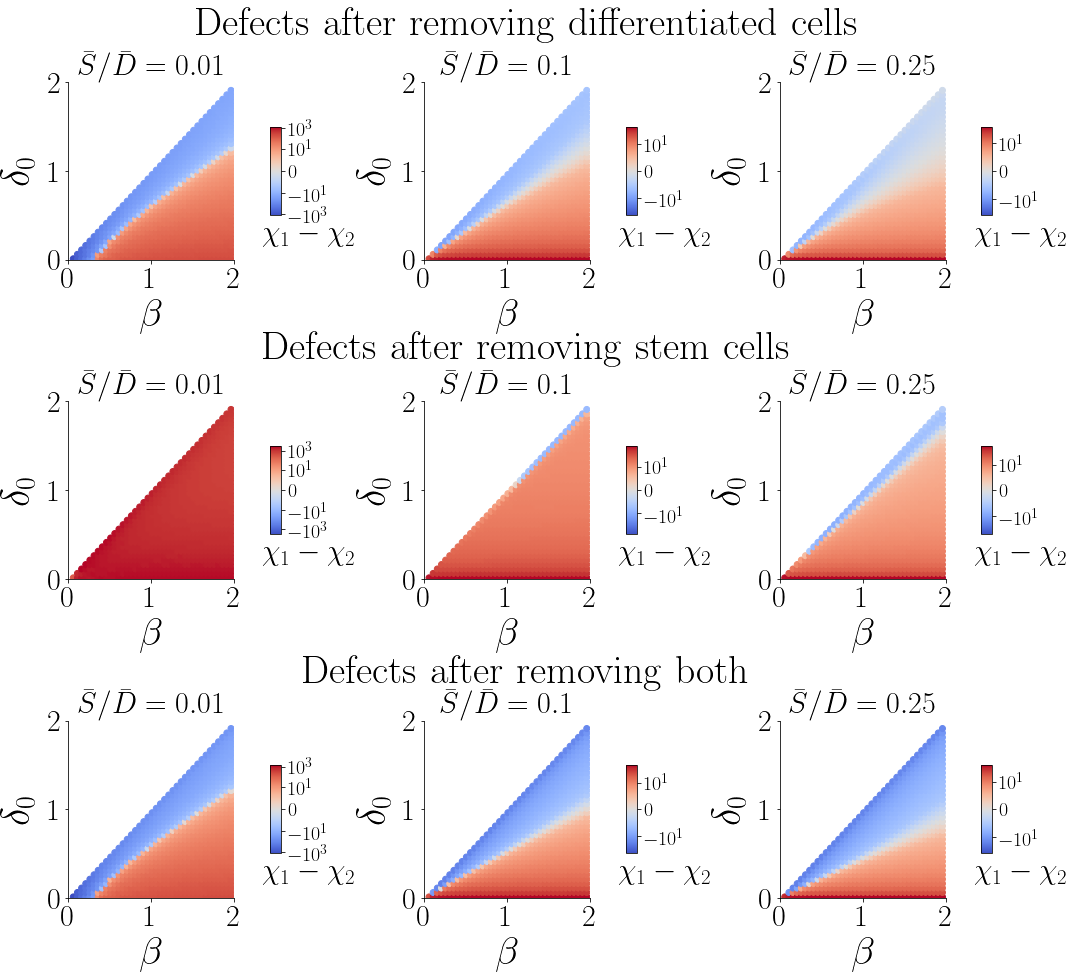

In [9]:
# Setting up the figure 
fig, ax = plt.subplots(3, 3, figsize=(17,15))
plt.subplots_adjust(wspace=.5, hspace=0.8)
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = ax.flatten()

###########################
# First row of subplots
###########################

# Size of the perturbation was
Delta_D_0 = -1000

# And actual plots
for i in range(3):
    response = np.array(defects_model1_perturbD[i])/Delta_D_0-np.array(defects_model2_perturbD[i])/Delta_D_0
    maximum = np.max(response)
    minimum = np.min(response)
    cbar_limit = np.max([np.abs(maximum), np.abs(minimum)])
    plot = ax.flatten()[i].scatter(xs_perturbD[i], ys_perturbD[i], c=response,
                  vmin=-cbar_limit, vmax=cbar_limit, cmap="coolwarm", norm=matplotlib.colors.SymLogNorm(linthresh=1, base=10))
    add_colourbar(fig, plot, ax.flatten()[i])

###########################
# Second row of subplots
###########################

# Size of the perturbation was
Delta_S_0 = -99

# And actual plots
for i in range(3):
    response = np.array(defects_model1_perturbS[i])/Delta_S_0-np.array(defects_model2_perturbS[i])/Delta_S_0
    maximum = np.max(response)
    minimum = np.min(response)
    cbar_limit = np.max([np.abs(maximum), np.abs(minimum)])
    plot = ax.flatten()[3+i].scatter(xs_perturbS[i], ys_perturbS[i], c=response,
                  vmin=-cbar_limit, vmax=cbar_limit, cmap="coolwarm", norm=matplotlib.colors.SymLogNorm(linthresh=1, base=10))
    add_colourbar(fig, plot, ax.flatten()[3+i])


###########################
# Third row of subplots
###########################

# Size of the perturbation was
Delta_D_0 = -1000

# And actual plots
for i in range(3):
    response = np.array(defects_model1_perturbSD[i])/Delta_D_0-np.array(defects_model2_perturbSD[i])/Delta_D_0
    maximum = np.max(response)
    minimum = np.min(response)
    cbar_limit = np.max([np.abs(maximum), np.abs(minimum)])
    plot = ax.flatten()[6+i].scatter(xs_perturbSD[i], ys_perturbSD[i], c=response,
                  vmin=-cbar_limit, vmax=cbar_limit, cmap="coolwarm", norm=matplotlib.colors.SymLogNorm(linthresh=1, base=10))
    add_colourbar(fig, plot, ax.flatten()[6+i])


###########################

# Make subplots a bit more aesthetically pleasing
for a in ax.flatten():
    beautify_ax(a)
    
# Set titles of the 9 subplots
for i in [0,3,6]:
    ax.flatten()[i].set_title(r"$\bar S / \bar D = 0.01$", fontsize=30)
    ax.flatten()[i+1].set_title(r"$\bar S / \bar D = 0.1$", fontsize=30)
    ax.flatten()[i+2].set_title(r"$\bar S / \bar D = 0.25$", fontsize=30)

# Set super-titles of the three rows
plt.figtext(0.5,0.95, "$\mathrm{Defects \ after \ removing \ differentiated \ cells}$", ha="center", va="top", fontsize=40)
plt.figtext(0.5,0.65, "$\mathrm{Defects \ after \ removing \ stem \ cells}$", ha="center", va="top", fontsize=40)
plt.figtext(0.5,0.35, "$\mathrm{Defects \ after \ removing \ both}$", ha="center", va="top", fontsize=40)

# Supplementary Figures

## Defects of model 2

Text(0.5, 0.35, '$\\mathrm{Defects \\ after \\ removing \\ both}$')

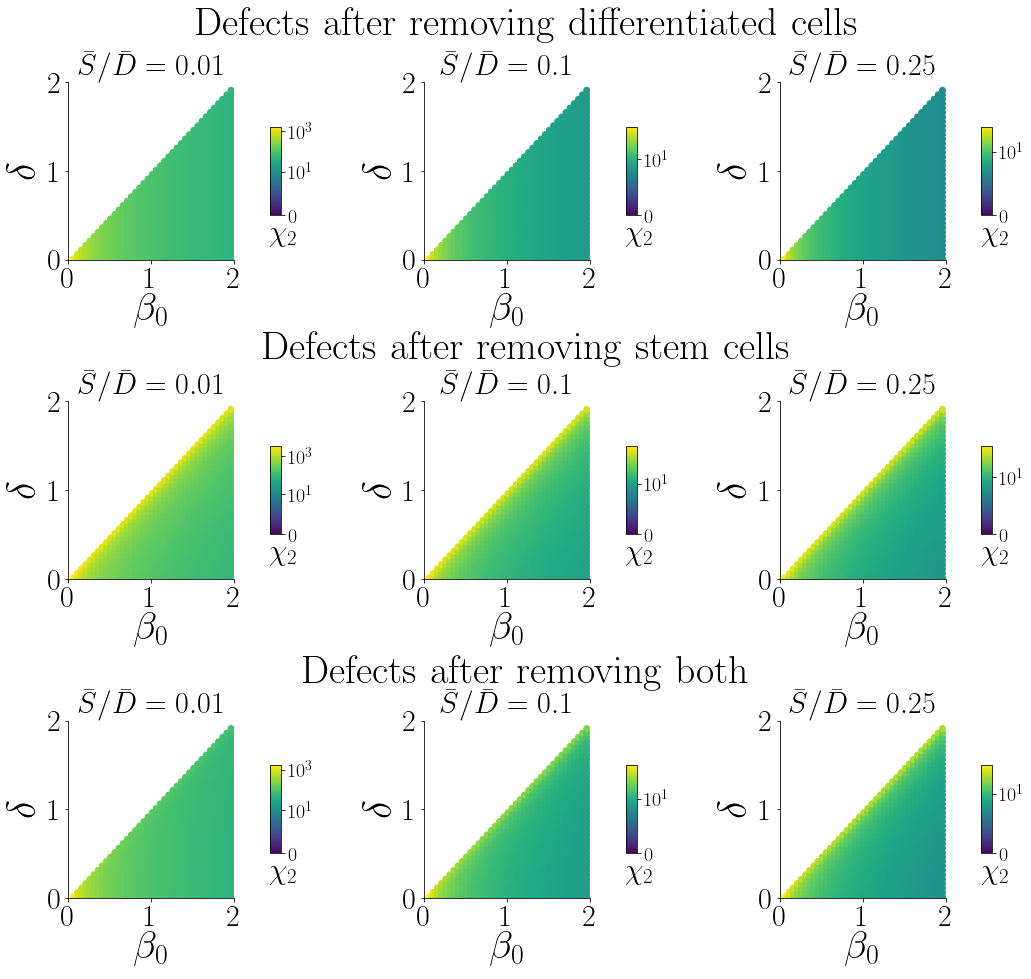

In [13]:
# Setting up the figure 
fig, ax = plt.subplots(3, 3, figsize=(17,15))
plt.subplots_adjust(wspace=.5, hspace=0.8)
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = ax.flatten()

###########################
# First row of subplots
###########################

# Size of the perturbation was
Delta_D_0 = -1000

# And actual plots
for i in range(3):
    response = np.array(np.array(defects_model2_perturbD[i])/Delta_D_0)
    maximum = np.max(response)
    plot = ax.flatten()[i].scatter(xs_perturbD[i], ys_perturbD[i], c=response,
                  vmin=0, vmax=maximum, cmap="viridis", norm=matplotlib.colors.SymLogNorm(linthresh=1, base=10))
    add_colourbar2(fig, plot, ax.flatten()[i])

###########################
# Second row of subplots
###########################

# Size of the perturbation was
Delta_S_0 = -99

# And actual plots
for i in range(3):
    response = np.array(np.array(defects_model2_perturbS[i])/Delta_S_0)
    maximum = np.max(response)
    plot = ax.flatten()[3+i].scatter(xs_perturbS[i], ys_perturbS[i], c=response,
                  vmin=0, vmax=maximum, cmap="viridis", norm=matplotlib.colors.SymLogNorm(linthresh=1, base=10))
    add_colourbar2(fig, plot, ax.flatten()[3+i])


###########################
# Third row of subplots
###########################

# Size of the perturbation was
Delta_D_0 = -1000

# And actual plots
for i in range(3):
    response = np.array(np.array(defects_model2_perturbSD[i])/Delta_D_0)
    maximum = np.max(response)
    plot = ax.flatten()[6+i].scatter(xs_perturbSD[i], ys_perturbSD[i], c=response,
                  vmin=0, vmax=maximum, cmap="viridis", norm=matplotlib.colors.SymLogNorm(linthresh=1, base=10))
    add_colourbar2(fig, plot, ax.flatten()[6+i])

###########################

# Make subplots a bit more aesthetically pleasing
for a in ax.flatten():
    beautify_ax2(a)
    
# Set titles of the 9 subplots
for i in [0,3,6]:
    ax.flatten()[i].set_title(r"$\bar S / \bar D = 0.01$", fontsize=30)
    ax.flatten()[i+1].set_title(r"$\bar S / \bar D = 0.1$", fontsize=30)
    ax.flatten()[i+2].set_title(r"$\bar S / \bar D = 0.25$", fontsize=30)

# Set super-titles of the three rows
plt.figtext(0.5,0.95, "$\mathrm{Defects \ after \ removing \ differentiated \ cells}$", ha="center", va="top", fontsize=40)
plt.figtext(0.5,0.65, "$\mathrm{Defects \ after \ removing \ stem \ cells}$", ha="center", va="top", fontsize=40)
plt.figtext(0.5,0.35, "$\mathrm{Defects \ after \ removing \ both}$", ha="center", va="top", fontsize=40)


## Defects of model 1

Text(0.5, 0.35, '$\\mathrm{Defects \\ after \\ removing \\ both}$')

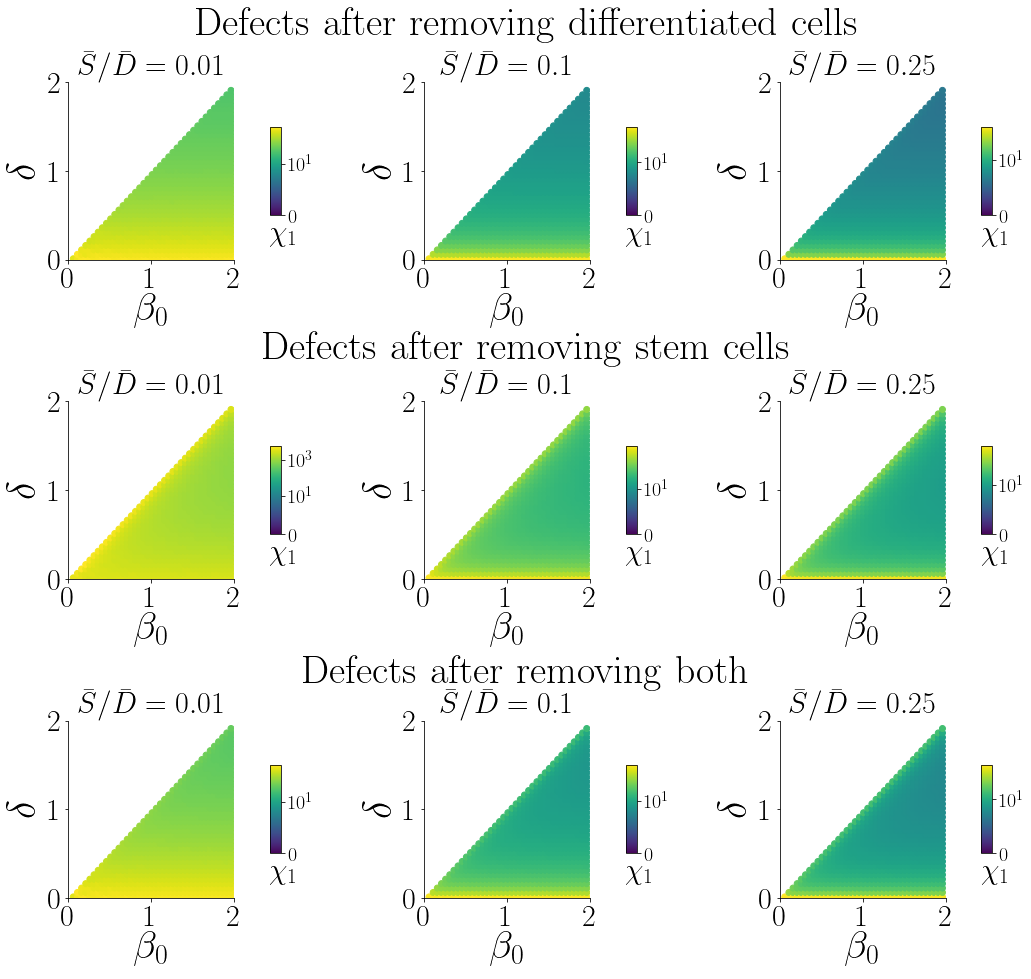

In [14]:
# Setting up the figure 
fig, ax = plt.subplots(3, 3, figsize=(17,15))
plt.subplots_adjust(wspace=.5, hspace=0.8)
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = ax.flatten()

###########################
# First row of subplots
###########################

# Size of the perturbation was
Delta_D_0 = -1000

# And actual plots
for i in range(3):
    response = np.array(np.array(defects_model1_perturbD[i])/Delta_D_0)
    maximum = np.max(response)
    plot = ax.flatten()[i].scatter(xs_perturbD[i], ys_perturbD[i], c=response,
                  vmin=0, vmax=maximum, cmap="viridis", norm=matplotlib.colors.SymLogNorm(linthresh=1, base=10))
    add_colourbar3(fig, plot, ax.flatten()[i])

###########################
# Second row of subplots
###########################

# Size of the perturbation was
Delta_S_0 = -99

# And actual plots
for i in range(3):
    response = np.array(np.array(defects_model1_perturbS[i])/Delta_S_0)
    maximum = np.max(response)
    plot = ax.flatten()[3+i].scatter(xs_perturbS[i], ys_perturbS[i], c=response,
                  vmin=0, vmax=maximum, cmap="viridis", norm=matplotlib.colors.SymLogNorm(linthresh=1, base=10))
    add_colourbar3(fig, plot, ax.flatten()[3+i])


###########################
# Third row of subplots
###########################

# Size of the perturbation was
Delta_D_0 = -1000

# And actual plots
for i in range(3):
    response = np.array(np.array(defects_model1_perturbSD[i])/Delta_D_0)
    maximum = np.max(response)
    plot = ax.flatten()[6+i].scatter(xs_perturbSD[i], ys_perturbSD[i], c=response,
                  vmin=0, vmax=maximum, cmap="viridis", norm=matplotlib.colors.SymLogNorm(linthresh=1, base=10))
    add_colourbar3(fig, plot, ax.flatten()[6+i])


###########################

# Make subplots a bit more aesthetically pleasing
for a in ax.flatten():
    beautify_ax2(a)
    
# Set titles of the 9 subplots
for i in [0,3,6]:
    ax.flatten()[i].set_title(r"$\bar S / \bar D = 0.01$", fontsize=30)
    ax.flatten()[i+1].set_title(r"$\bar S / \bar D = 0.1$", fontsize=30)
    ax.flatten()[i+2].set_title(r"$\bar S / \bar D = 0.25$", fontsize=30)

# Set super-titles of the three rows
plt.figtext(0.5,0.95, "$\mathrm{Defects \ after \ removing \ differentiated \ cells}$", ha="center", va="top", fontsize=40)
plt.figtext(0.5,0.65, "$\mathrm{Defects \ after \ removing \ stem \ cells}$", ha="center", va="top", fontsize=40)
plt.figtext(0.5,0.35, "$\mathrm{Defects \ after \ removing \ both}$", ha="center", va="top", fontsize=40)

## Defects of model 3

Text(0.5, 0.35, '$\\mathrm{Defects \\ after \\ removing \\ both}$')

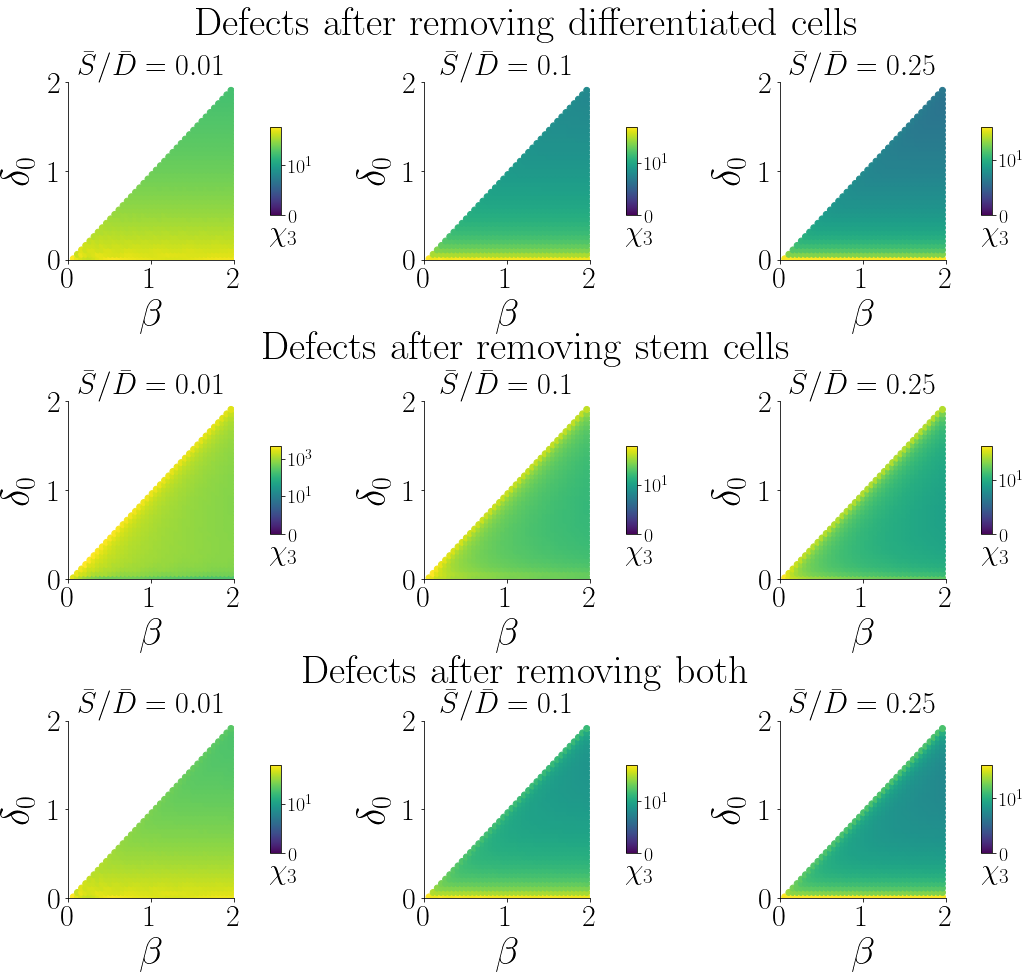

In [17]:
# Setting up the figure 
fig, ax = plt.subplots(3, 3, figsize=(17,15))
plt.subplots_adjust(wspace=.5, hspace=0.8)

###########################
# First row of subplots
###########################

# Size of the perturbation was
Delta_D_0 = -1000

# And actual plots
for i in range(3):
    response = np.array(np.array(defects_model3_perturbD[i])/Delta_D_0)
    maximum = np.max(response)
    plot = ax.flatten()[i].scatter(xs_perturbD[i], ys_perturbD[i], c=response,
                  vmin=0, vmax=maximum, cmap="viridis", norm=matplotlib.colors.SymLogNorm(linthresh=1, base=10))
    add_colourbar5(fig, plot, ax.flatten()[i])

###########################
# Second row of subplots
###########################

# Size of the perturbation was
Delta_S_0 = -99

# And actual plots
for i in range(3):
    response = np.array(np.array(defects_model3_perturbS[i])/Delta_S_0)
    maximum = np.max(response)
    plot = ax.flatten()[3+i].scatter(xs_perturbS[i], ys_perturbS[i], c=response,
                  vmin=0, vmax=maximum, cmap="viridis", norm=matplotlib.colors.SymLogNorm(linthresh=1, base=10))
    add_colourbar5(fig, plot, ax.flatten()[3+i])

###########################
# Third row of subplots
###########################

    
# Size of the perturbation was
Delta_D_0 = -1000

# And actual plots
for i in range(3):
    response = np.array(np.array(defects_model3_perturbSD[i])/Delta_D_0)
    maximum = np.max(response)
    plot = ax.flatten()[6+i].scatter(xs_perturbSD[i], ys_perturbSD[i], c=response,
                  vmin=0, vmax=maximum, cmap="viridis", norm=matplotlib.colors.SymLogNorm(linthresh=1, base=10))
    add_colourbar5(fig, plot, ax.flatten()[6+i])


###########################

# Make subplots a bit more aesthetically pleasing
for a in ax.flatten():
    beautify_ax(a)
    
# Set titles of the 9 subplots
for i in [0,3,6]:
    ax.flatten()[i].set_title(r"$\bar S / \bar D = 0.01$", fontsize=30)
    ax.flatten()[i+1].set_title(r"$\bar S / \bar D = 0.1$", fontsize=30)
    ax.flatten()[i+2].set_title(r"$\bar S / \bar D = 0.25$", fontsize=30)

# Set super-titles of the three rows
plt.figtext(0.5,0.95, "$\mathrm{Defects \ after \ removing \ differentiated \ cells}$", ha="center", va="top", fontsize=40)
plt.figtext(0.5,0.65, "$\mathrm{Defects \ after \ removing \ stem \ cells}$", ha="center", va="top", fontsize=40)
plt.figtext(0.5,0.35, "$\mathrm{Defects \ after \ removing \ both}$", ha="center", va="top", fontsize=40)


## Defects of model 4

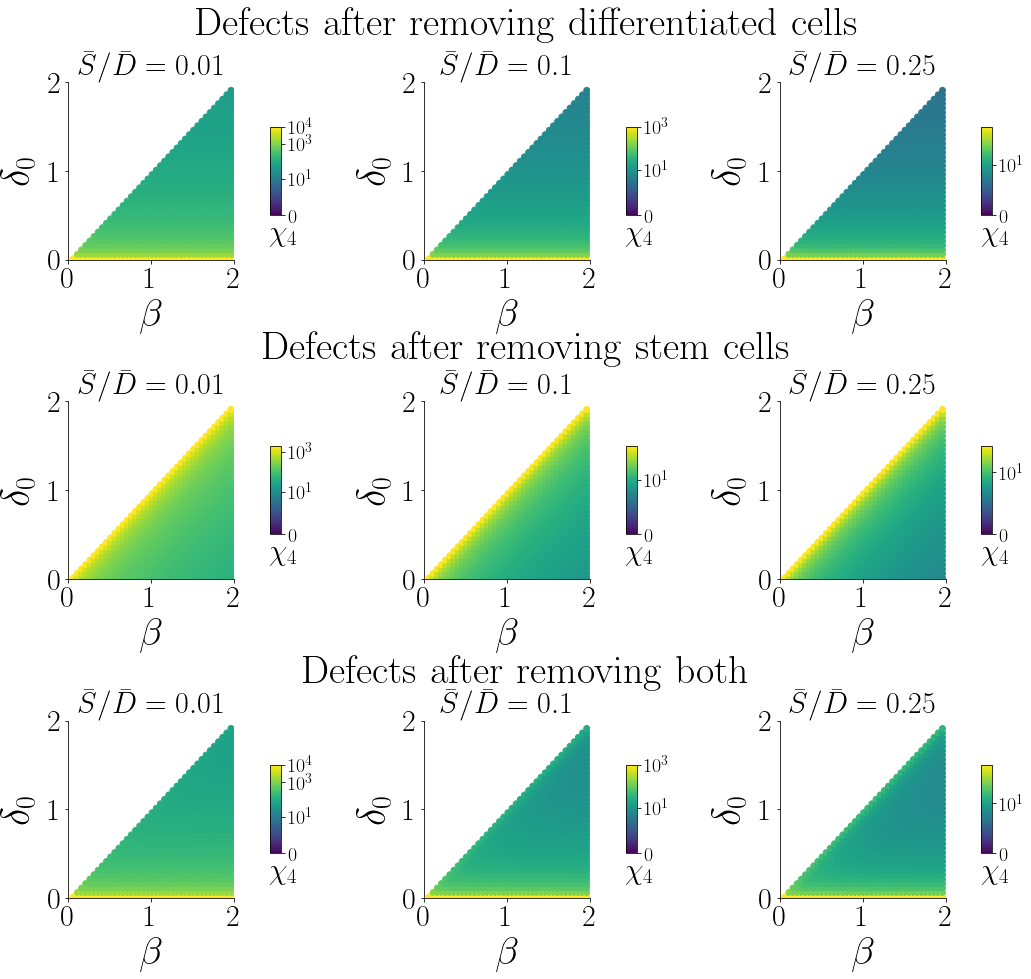

In [18]:
# Setting up the figure 
fig, ax = plt.subplots(3, 3, figsize=(17,15))
plt.subplots_adjust(wspace=.5, hspace=0.8)

###########################
# First row of subplots
###########################

# Size of the perturbation was
Delta_D_0 = -1000

# And actual plots
for i in range(3):
    response = np.array(np.array(defects_model4_perturbD[i])/Delta_D_0)
    maximum = np.max(response)
    plot = ax.flatten()[i].scatter(xs_perturbD[i], ys_perturbD[i], c=response,
                  vmin=0, vmax=maximum, cmap="viridis", norm=matplotlib.colors.SymLogNorm(linthresh=1, base=10))
    add_colourbar4(fig, plot, ax.flatten()[i])

###########################
# Second row of subplots
###########################

# Size of the perturbation was
Delta_S_0 = -99

# And actual plots
for i in range(3):
    response = np.array(np.array(defects_model4_perturbS[i])/Delta_S_0)
    maximum = np.max(response)
    plot = ax.flatten()[3+i].scatter(xs_perturbS[i], ys_perturbS[i], c=response,
                  vmin=0, vmax=maximum, cmap="viridis", norm=matplotlib.colors.SymLogNorm(linthresh=1, base=10))
    add_colourbar4(fig, plot, ax.flatten()[3+i])

###########################
# Third row of subplots
###########################

    
# Size of the perturbation was
Delta_D_0 = -1000

# And actual plots
for i in range(3):
    response = np.array(np.array(defects_model4_perturbSD[i])/Delta_D_0)
    maximum = np.max(response)
    plot = ax.flatten()[6+i].scatter(xs_perturbSD[i], ys_perturbSD[i], c=response,
                  vmin=0, vmax=maximum, cmap="viridis", norm=matplotlib.colors.SymLogNorm(linthresh=1, base=10))
    add_colourbar4(fig, plot, ax.flatten()[6+i])


###########################

# Make subplots a bit more aesthetically pleasing
for a in ax.flatten():
    beautify_ax(a)
    
# Set titles of the 9 subplots
for i in [0,3,6]:
    ax.flatten()[i].set_title(r"$\bar S / \bar D = 0.01$", fontsize=30)
    ax.flatten()[i+1].set_title(r"$\bar S / \bar D = 0.1$", fontsize=30)
    ax.flatten()[i+2].set_title(r"$\bar S / \bar D = 0.25$", fontsize=30)

# Set super-titles of the three rows
plt.figtext(0.5,0.95, "$\mathrm{Defects \ after \ removing \ differentiated \ cells}$", ha="center", va="top", fontsize=40)
plt.figtext(0.5,0.65, "$\mathrm{Defects \ after \ removing \ stem \ cells}$", ha="center", va="top", fontsize=40)
plt.figtext(0.5,0.35, "$\mathrm{Defects \ after \ removing \ both}$", ha="center", va="top", fontsize=40)

plt.savefig("defects_mod_4.pdf", bbox_inches="tight")